In [4]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

In [ ]:
# import sqlalchemy as sa
# engine = sa.create_engine('mssql+pyodbc://localhost/banking')

In [ ]:
!pip install mysql-connector-python

In [7]:
connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="12345678x@X",
  database='banking'
)

In [10]:
sql = "SELECT * FROM ACCOUNT"
account = pd.read_sql(sql, connection)

In [11]:
account.head(2)

,ACCOUNT_ID,AVAIL_BALANCE,CLOSE_DATE,LAST_ACTIVITY_DATE,OPEN_DATE,PENDING_BALANCE,STATUS,CUST_ID,OPEN_BRANCH_ID,OPEN_EMP_ID,PRODUCT_CD
0,1,1057.75,None,2005-01-04,2000-01-15,1057.75,ACTIVE,1,2,10,CHK
1,2,500.00,None,2004-12-19,2000-01-15,500.00,ACTIVE,1,2,10,SAV


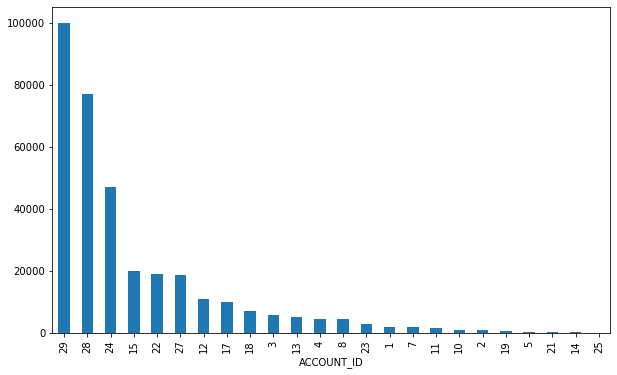

In [15]:
account['TOTAL_BALANCE'] = account.eval('AVAIL_BALANCE + PENDING_BALANCE')
account.groupby('ACCOUNT_ID').TOTAL_BALANCE.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6));

In [16]:
query = """
select account_id, concat(first_name, ' ', last_name) as full_name,  
		address, avail_balance, pending_balance, b.name as business_name from ACCOUNT a 
		left join customer c on a.cust_id = c.cust_id
        left join individual i on c.cust_id = i.cust_id
        left join business b on c.cust_id = b.cust_id
"""

df_demographic = pd.read_sql(query, connection)
df_demographic

,account_id,full_name,address,avail_balance,pending_balance,business_name
0,1,James Hadley,47 Mockingbird Ln,1057.75,1057.75,None
1,2,James Hadley,47 Mockingbird Ln,500.00,500.00,None
2,3,James Hadley,47 Mockingbird Ln,3000.00,3000.00,None
3,4,Susan Tingley,372 Clearwater Blvd,2258.02,2258.02,None
4,5,Susan Tingley,372 Clearwater Blvd,200.00,200.00,None
5,7,Frank Tucker,18 Jessup Rd,1057.75,1057.75,None
6,8,Frank Tucker,18 Jessup Rd,2212.50,2212.50,None
7,10,John Hayward,12 Buchanan Ln,534.12,534.12,None
8,11,John Hayward,12 Buchanan Ln,767.77,767.77,None
9,12,John Hayward,12 Buchanan Ln,5487.09,5487.09,None


In [21]:
select_account = """
SELECT account_id, avail_balance, pending_balance, cust_id FROM account
"""
select_cus = """
SELECT cust_id, address FROM customer
"""

df_account = pd.read_sql(select_account, connection)
df_cust = pd.read_sql(select_cus, connection)

In [23]:
df_account.head(2)

,account_id,avail_balance,pending_balance,cust_id
0,1,1057.75,1057.75,1
1,2,500.00,500.00,1


In [24]:
df_cust.head(2)

,cust_id,address
0,1,47 Mockingbird Ln
1,2,372 Clearwater Blvd


In [25]:
df_account.merge(df_cust, on='cust_id', how='left')

,account_id,avail_balance,pending_balance,cust_id,address
0,1,1057.75,1057.75,1,47 Mockingbird Ln
1,2,500.00,500.00,1,47 Mockingbird Ln
2,3,3000.00,3000.00,1,47 Mockingbird Ln
3,4,2258.02,2258.02,2,372 Clearwater Blvd
4,5,200.00,200.00,2,372 Clearwater Blvd
5,7,1057.75,1057.75,3,18 Jessup Rd
6,8,2212.50,2212.50,3,18 Jessup Rd
7,10,534.12,534.12,4,12 Buchanan Ln
8,11,767.77,767.77,4,12 Buchanan Ln
9,12,5487.09,5487.09,4,12 Buchanan Ln


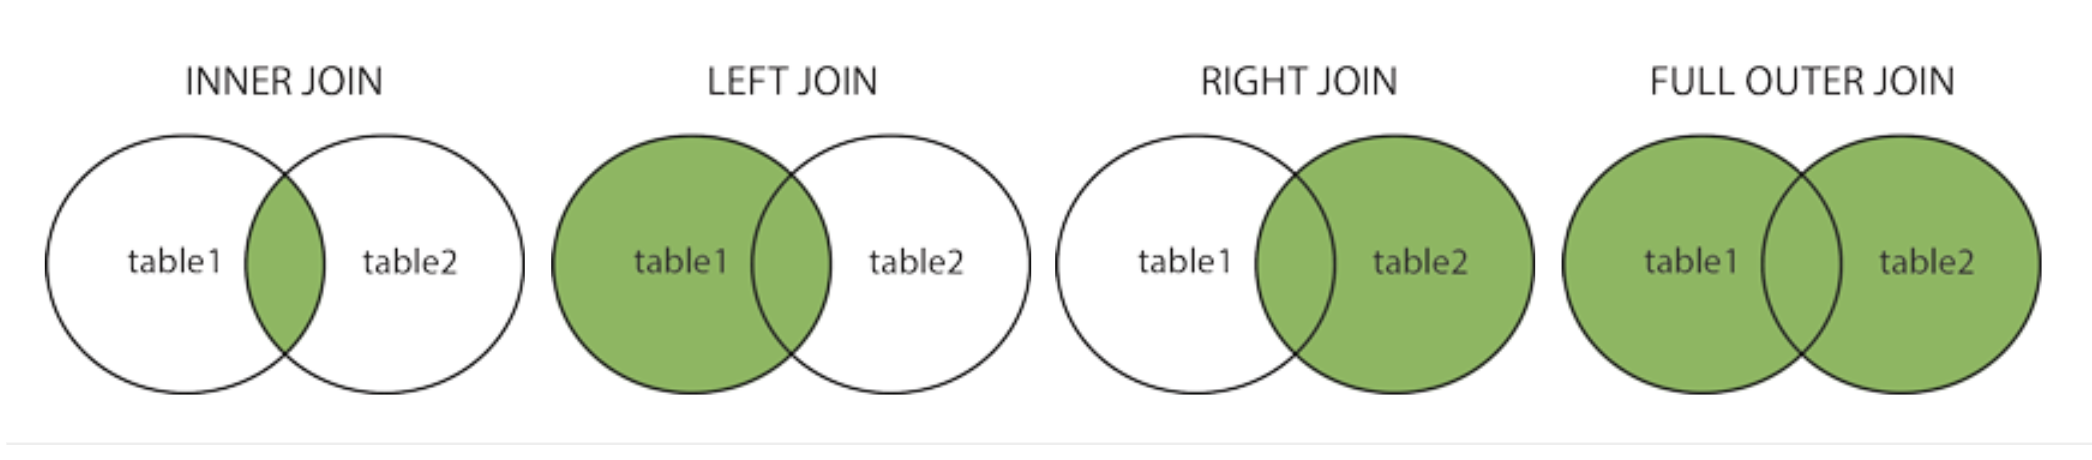